<a href="https://colab.research.google.com/github/7PAM2015-0509-23-Group7/Kaggle-Challenge/blob/main/Kaggle_Challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#!apt-get install git
#!pip install shap
#!pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=a45685de765180ddf7f2bde7631ac0b04bd787b941dc310cf802f96cee01eca9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Importing important libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn import preprocessing
import shap
import lime
import lime.lime_tabular

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# 1)  Load data

Once the train and test data from the [Kaggle Challenge webpage](https://www.kaggle.com/competitions/spaceship-titanic/data) is uploaded onto your GitHub  repository, it can be read into this Colab notebook.

Use the code provided below to do this (adding the correct paths to your own GitHub data). See the notes & videos in [Lecture 4](https://herts.instructure.com/courses/113392/files/8945743?module_item_id=3831910) for more details.





In [6]:
import pandas as pd
training_data = 'https://raw.githubusercontent.com/7PAM2015-0509-23-Group7/Kaggle-Challenge/main/train.csv'
train = pd.read_csv(training_data)
print(train.shape)
print(train.info())
train.head()

(8693, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test_data = 'https://raw.githubusercontent.com/7PAM2015-0509-23-Group7/Kaggle-Challenge/main/test.csv'
test = pd.read_csv(test_data)
print(test.shape)
print(test.info())
test.head()


(4277, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# 2) EDA

Here, you can show plots illustrating the initial dataset. This will help you with "domain knowledge" and identify any missing values.

The **missingno** package provides some useful tools for visualising missing data, for example the "missing data" matrix shown below:

<Axes: >

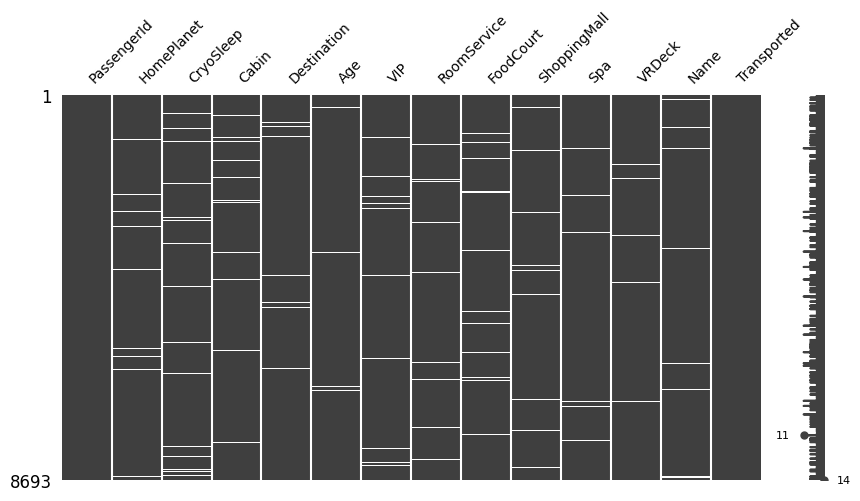

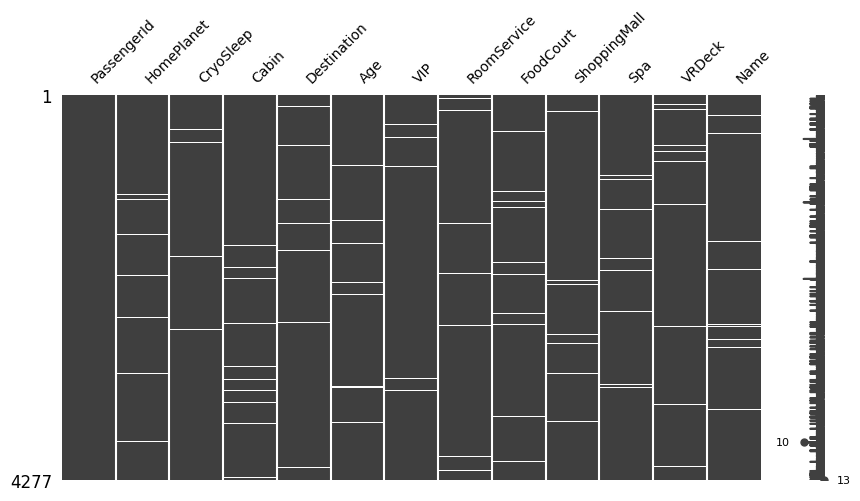

In [8]:
msno.matrix(train,figsize=(10,5),fontsize=10)
msno.matrix(test,figsize=(10,5),fontsize=10)


Results without any preprocessing from orignal data

In [12]:
# Making predictions  from original dataset:
# encoding the data

target_column = 'Transported'

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
train_imputed = pd.DataFrame(imputer.fit_transform(train))
train_imputed.columns = train.columns

# Encoding categorical features
label_encoders = {}
for column in train_imputed.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_imputed[column] = le.fit_transform(train_imputed[column])
    label_encoders[column] = le

# Split the data into train and test
train_o = train_imputed.sample(frac=0.7, random_state=123)
test_o = train_imputed.drop(train_o.index)

# Define the model
model = RandomForestRegressor(random_state=123)

# Train the model on original data
model.fit(train_o.drop(target_column, axis=1), train_o[target_column])

# Making predictions
predictions = model.predict(test_o.drop(target_column, axis=1))

# Calculate MSE
mse = mean_squared_error(test_o[target_column], predictions)
print(f'MSE without pre-processing: {mse}')

MSE without pre-processing: 0.14399486196319017


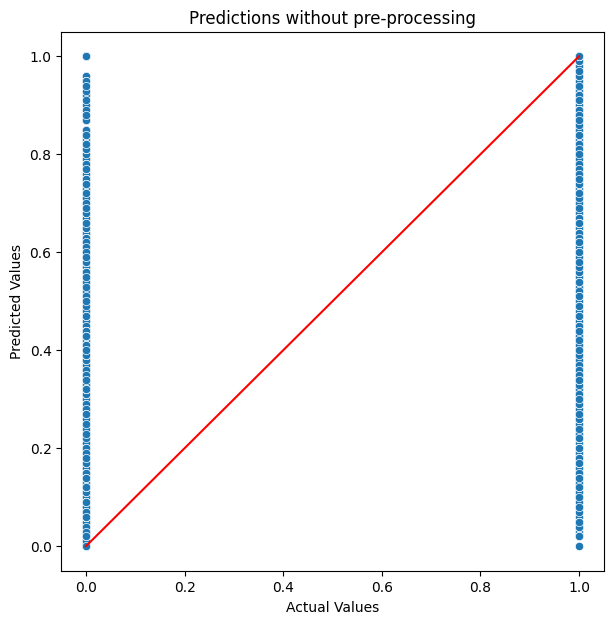

In [13]:
# Plot predictions from the original dataset
df_original = pd.DataFrame({'actual': test_o[target_column], 'predicted': predictions})  # Create a dataframe to plot
df_original.name = "without pre-processing"
plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_original, x='actual', y='predicted')
plt.plot([min(df_original['actual']), max(df_original['actual'])], [min(df_original['actual']), max(df_original['actual'])], color='red')  # plot one-to-one line for reference
plt.title('Predictions ' + df_original.name)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Now that we know without preprocessing results are not quite good we are performing EDA for better understanding

**Checking if data is balanced**

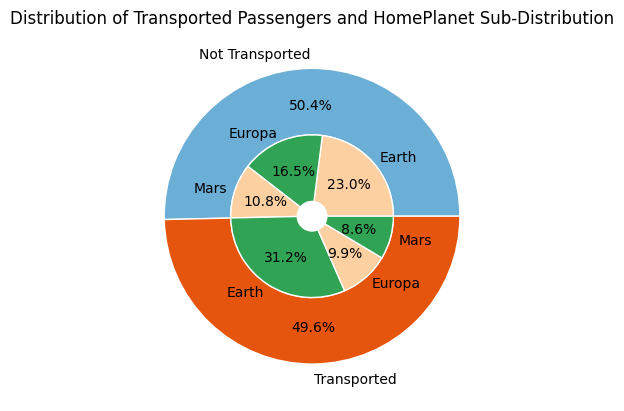

In [18]:
# EDA: Pie chart
fig, ax = plt.subplots()
cmap = plt.colormaps["tab20c"]
outer_colors = cmap([1, 4])
inner_colors = cmap([7, 8, 7, 8])
size = 0.45
pctdist = 0.75

# Counts of people who were transported or not
df_tot = train['Transported'].value_counts()

# Outer pie chart (to show distribution of target variable)
ax.pie(
    np.array(df_tot),
    autopct='%1.1f%%',
    pctdistance=pctdist,
    radius=1.0,
    colors=outer_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Not Transported', 'Transported']
)

# Counts of transported passengers, by HomePlanet
df_transported = train.HomePlanet[train['Transported'] == 1].value_counts()

# Counts of non-transported passengers, by HomePlanet
df_not_transported = train.HomePlanet[train['Transported'] == 0].value_counts()

# Concatenate arrays, for use in inner pie chart
df_transported_by_planet = np.concatenate((np.array(df_transported), np.array(df_not_transported)))

# Inner pie chart (to show sub-distribution of "HomePlanet")
ax.pie(
    df_transported_by_planet,
    autopct='%1.1f%%',
    radius=1.0 - size,
    colors=inner_colors,
    wedgeprops=dict(width=size, edgecolor='w'),
    labels=['Earth', 'Europa', 'Mars', 'Earth', 'Europa', 'Mars']
)
plt.title('Distribution of Transported Passengers and HomePlanet Sub-Distribution')
plt.show()


Applying Bar charts to know if data has appropriate distributed freatures

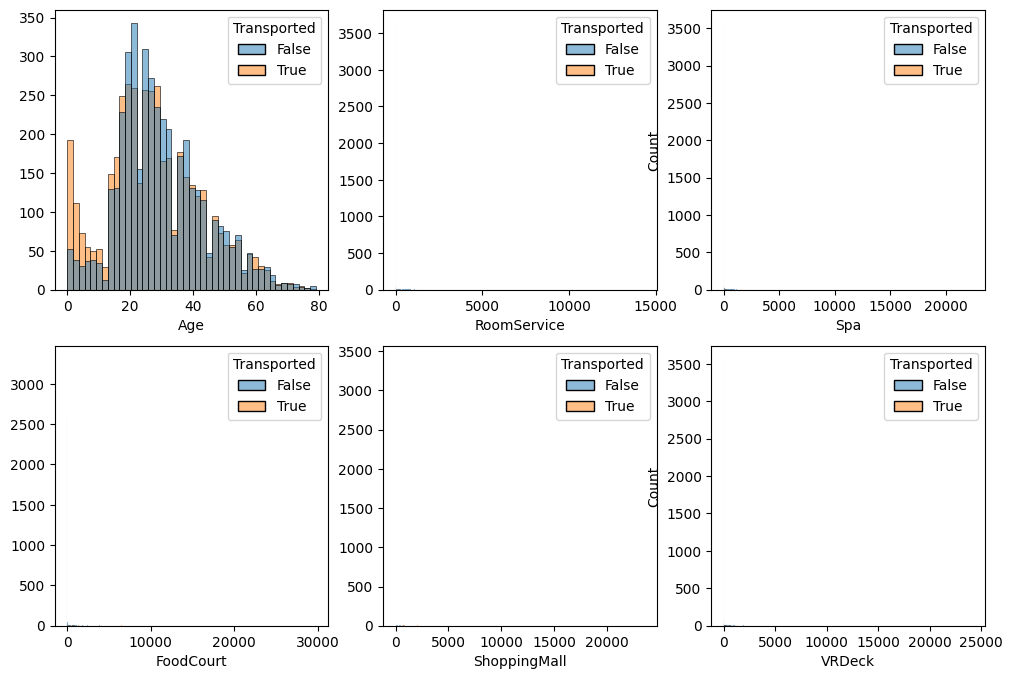

In [17]:
# EDA: Basic bar plots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

sns.histplot(x='Age', data=train, hue='Transported', ax=axs[0, 0])
sns.histplot(x='RoomService', data=train, hue='Transported', ax=axs[0, 1])
sns.histplot(x='FoodCourt', data=train, hue='Transported', ax=axs[1, 0])
sns.histplot(x='ShoppingMall', data=train, hue='Transported', ax=axs[1, 1])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')

# Add bar plots of other interesting features from this dataset too
sns.histplot(x='Spa', data=train, hue='Transported', ax=axs[0, 2])
sns.histplot(x='VRDeck', data=train, hue='Transported', ax=axs[1, 2])

plt.show()


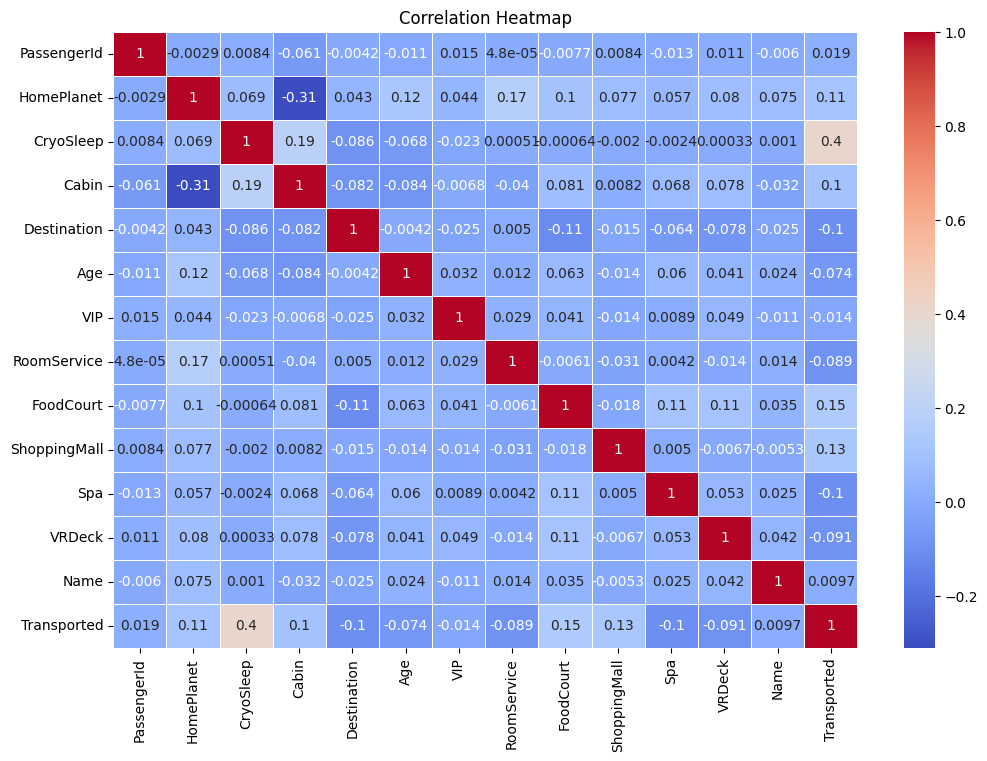

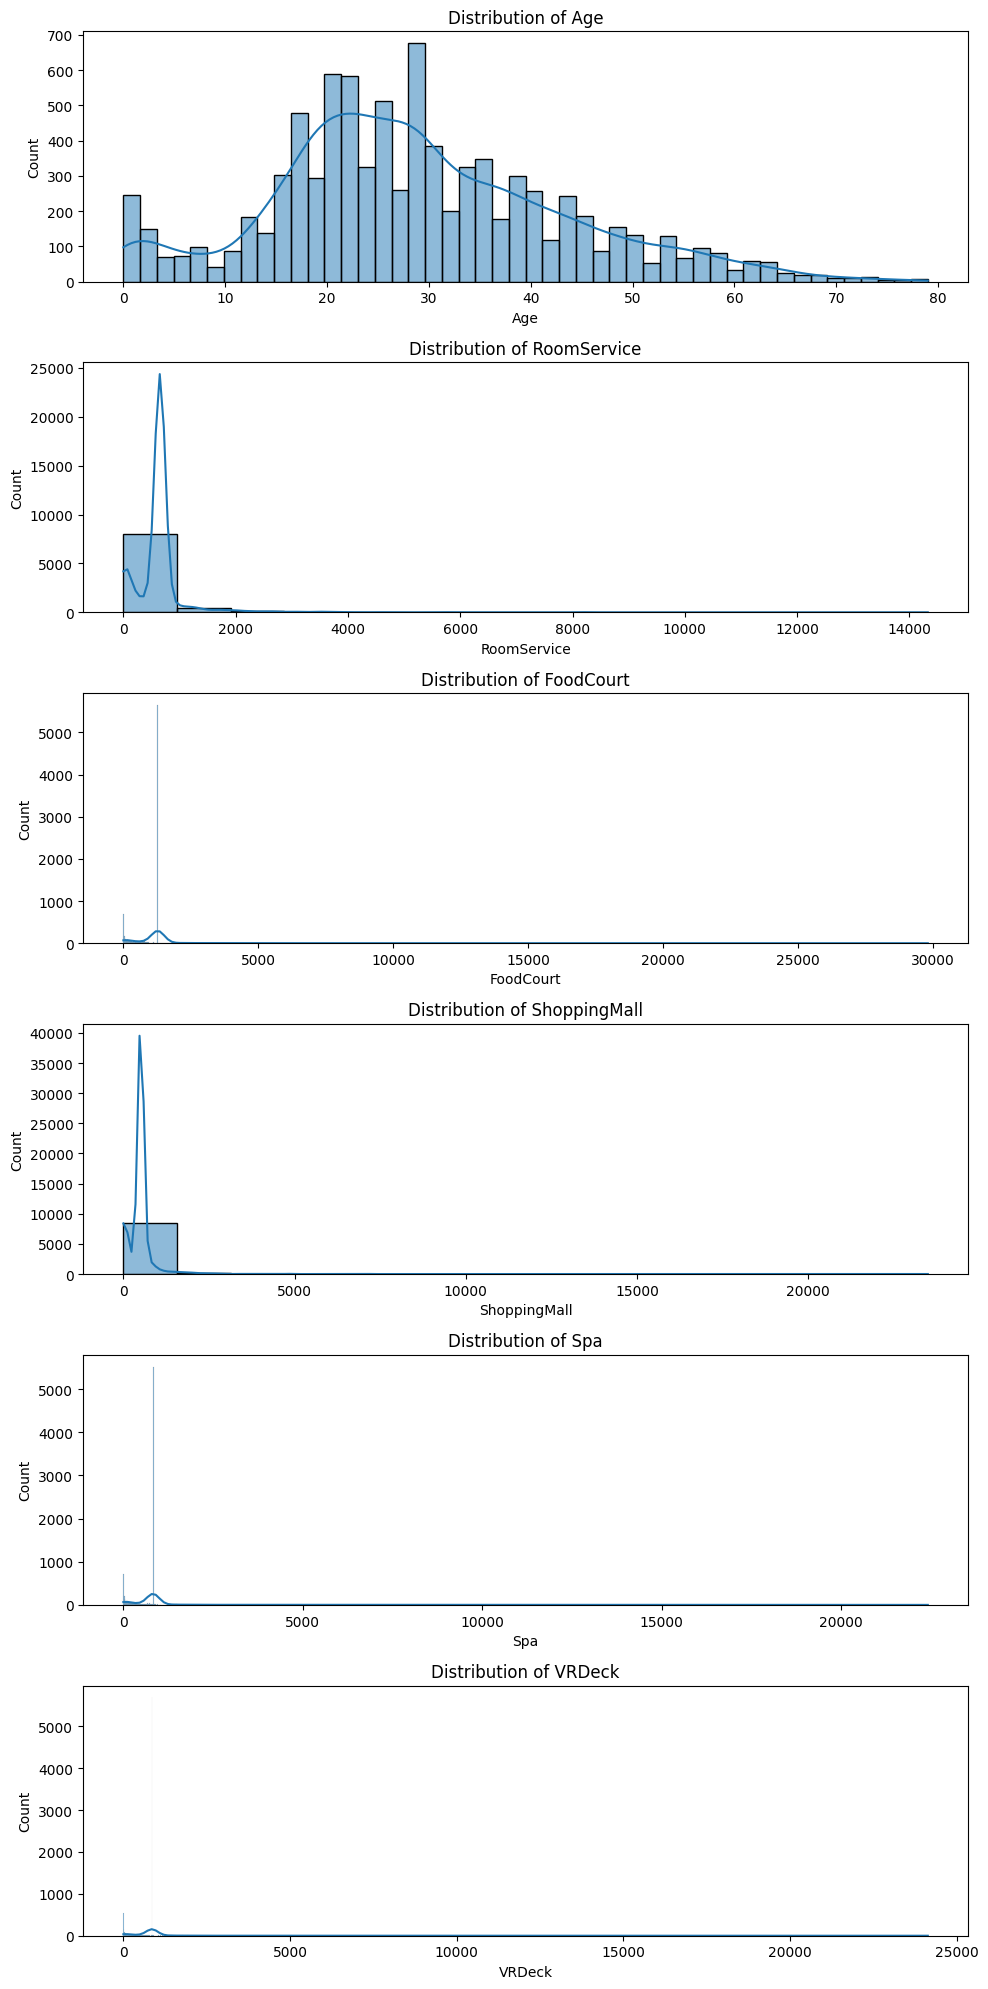

In [ ]:
# Data cleaning and imputation:

# Set 0s to NaNs in 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' columns
columns_to_replace = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for column in columns_to_replace:
    train[column].replace(0, np.nan, inplace=True)

# Replace NaNs with mean value
train.fillna(train.mean(skipna=True, numeric_only=True), inplace=True)



# Encode categorical features using Label Encoding
label_encoders = {}
categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'PassengerId']
for column in categorical_features:
    le = LabelEncoder()
    train[column] = le.fit_transform(train[column].astype(str))
    label_encoders[column] = le

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Distribution plots for numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    sns.histplot(train[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Box plots to check for outliers
fig, axs = plt.subplots(1, len(numerical_features), figsize=(20, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(y=train[feature], ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

# Count plots for categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, axs = plt.subplots(1, len(categorical_features), figsize=(20, 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(x=train[feature], ax=axs[i])
    axs[i].set_title(f'Count Plot of {feature}')

